# Demo for Bayesian Network Estimation with FROSTY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from generate_graphs import generate_barabasi, generate_data

import sys
sys.path.insert(1, '../frosty')
from frosty import frosty

## Generate Graph & Data

In [2]:
# generate graph & data
p = 50
B = generate_barabasi(p=p, m=1)
X = generate_data(B, lower_weight=0.25, upper_weight=1.0, n_prop_to_p=20)

# randomly permute variable ordering
P = np.eye(p)
np.random.seed(2023)
np.random.shuffle(P.T)
X = X @ P.T

## FROSTY

In [3]:
# estimate bayesian network
B_hat = frosty(X, alpha=0.99, b=200, diag=True)
B_hat = P.T @ B_hat @ P
B_hat = np.where(B_hat != 0, 1, 0)

## Visualize Results

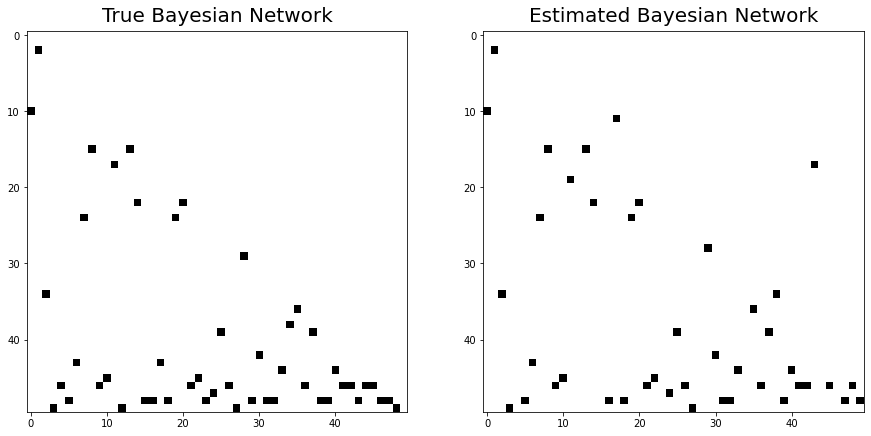

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes = axes.ravel()

axes[0].set_title('True Bayesian Network', fontsize=20, y=1.01)
axes[0].imshow(np.ma.masked_equal(B, 0), interpolation='nearest', vmin=0, vmax=1, cmap='Greys')

axes[1].set_title('Estimated Bayesian Network', fontsize=20, y=1.01)
axes[1].imshow(np.ma.masked_equal(B_hat, 0), interpolation='nearest', vmin=0, vmax=1, cmap='Greys');

# plt.savefig('images/frosty-estimtion.png', bbox_inches='tight', facecolor='white');

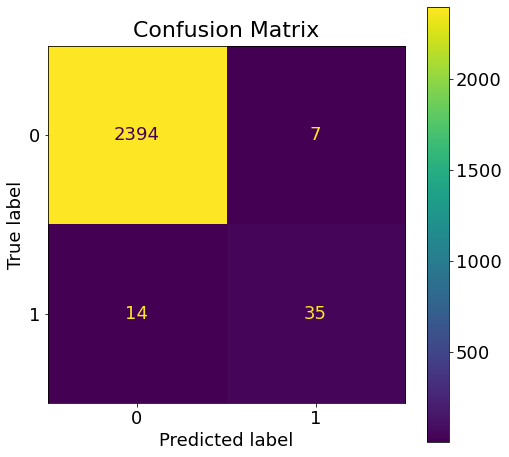

In [5]:
# get confusion matrix
B_vec, B_hat_vec = B.ravel(), B_hat.ravel()
indx = np.arange(0, p**2, p+1)
B_vec = np.where(B_vec != 0, 1, 0)
B_vec = np.delete(B_vec, indx)
B_hat_vec = np.where(B_hat_vec != 0, 1, 0)
B_hat_vec = np.delete(B_hat_vec, indx)
cm = confusion_matrix(B_vec, B_hat_vec)

# display confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams.update({'font.size': 18})
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix', fontsize=22, y=1.01)
# plt.savefig('images/confusion-matrix.png', bbox_inches='tight', facecolor='white')
plt.show();